In [57]:
import numpy as np
import pandas as pd
import re
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from matplotlib import colors
from collections import defaultdict

from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors


In [2]:
anime = pd.read_csv("/Users/adithyaabhishek/Desktop/USML/project/report/data/anime.csv", dtype=str) 
usecols = ['MAL_ID', 'Name', 'sypnopsis']
anime_desc = pd.read_csv('/Users/adithyaabhishek/Desktop/USML/project/report/data/anime_with_synopsis.csv', usecols=usecols)


In [3]:
anime.head(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [4]:
X = anime['Genres'].str.split(', ').explode().tolist()
print(X[:100])

['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space', 'Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space', 'Action', 'Sci-Fi', 'Adventure', 'Comedy', 'Drama', 'Shounen', 'Action', 'Mystery', 'Police', 'Supernatural', 'Drama', 'Magic', 'Adventure', 'Fantasy', 'Shounen', 'Supernatural', 'Action', 'Sports', 'Comedy', 'Shounen', 'Comedy', 'Drama', 'Josei', 'Romance', 'Slice of Life', 'Slice of Life', 'Comedy', 'Sports', 'Shounen', 'Action', 'Cars', 'Sports', 'Drama', 'Seinen', 'Drama', 'Horror', 'Mystery', 'Police', 'Psychological', 'Seinen', 'Thriller', 'Action', 'Adventure', 'Comedy', 'Super Power', 'Martial Arts', 'Shounen', 'Action', 'Adventure', 'Comedy', 'Super Power', 'Drama', 'Fantasy', 'Shounen', 'Action', 'Comedy', 'Sports', 'School', 'Shounen', 'Action', 'Shounen', 'Sports', 'Comedy', 'Romance', 'School', 'Shounen', 'Action', 'Adventure', 'Comedy', 'Ecchi', 'Sci-Fi', 'Shounen', 'Action', 'Sci-Fi', 'Psychological', 'Drama', 'Action', 'Supernatural', 'Vampire', 'Comedy', 'Shou

In [6]:
x = anime['Genres'].str.split(', ').explode().tolist()
unique_genre = []
for i in x:
    if i not in unique_genre:
        unique_genre.append(i)

In [7]:
empty_dict = {}
for i in unique_genre:
    empty_dict[i] = len(anime[anime.Genres == i])

In [8]:
keys = empty_dict.keys()
values = empty_dict.values()
print(keys)
print(values)


dict_keys(['Action', 'Adventure', 'Comedy', 'Drama', 'Sci-Fi', 'Space', 'Mystery', 'Shounen', 'Police', 'Supernatural', 'Magic', 'Fantasy', 'Sports', 'Josei', 'Romance', 'Slice of Life', 'Cars', 'Seinen', 'Horror', 'Psychological', 'Thriller', 'Super Power', 'Martial Arts', 'School', 'Ecchi', 'Vampire', 'Military', 'Historical', 'Dementia', 'Mecha', 'Demons', 'Samurai', 'Game', 'Shoujo', 'Harem', 'Music', 'Shoujo Ai', 'Shounen Ai', 'Kids', 'Hentai', 'Parody', 'Yuri', 'Yaoi', 'Unknown'])
dict_values([65, 90, 668, 136, 65, 7, 25, 8, 1, 23, 21, 153, 61, 1, 20, 217, 8, 4, 21, 11, 1, 0, 3, 20, 27, 3, 5, 87, 228, 19, 2, 4, 26, 6, 2, 790, 0, 2, 413, 969, 14, 0, 3, 63])


In [9]:
import operator
sorted_d = dict( sorted(empty_dict.items(), key=operator.itemgetter(1),reverse=True))
print(sorted_d)

{'Hentai': 969, 'Music': 790, 'Comedy': 668, 'Kids': 413, 'Dementia': 228, 'Slice of Life': 217, 'Fantasy': 153, 'Drama': 136, 'Adventure': 90, 'Historical': 87, 'Action': 65, 'Sci-Fi': 65, 'Unknown': 63, 'Sports': 61, 'Ecchi': 27, 'Game': 26, 'Mystery': 25, 'Supernatural': 23, 'Magic': 21, 'Horror': 21, 'Romance': 20, 'School': 20, 'Mecha': 19, 'Parody': 14, 'Psychological': 11, 'Shounen': 8, 'Cars': 8, 'Space': 7, 'Shoujo': 6, 'Military': 5, 'Seinen': 4, 'Samurai': 4, 'Martial Arts': 3, 'Vampire': 3, 'Yaoi': 3, 'Demons': 2, 'Harem': 2, 'Shounen Ai': 2, 'Police': 1, 'Josei': 1, 'Thriller': 1, 'Super Power': 0, 'Shoujo Ai': 0, 'Yuri': 0}


TOP 20 ANIME GENRES

44


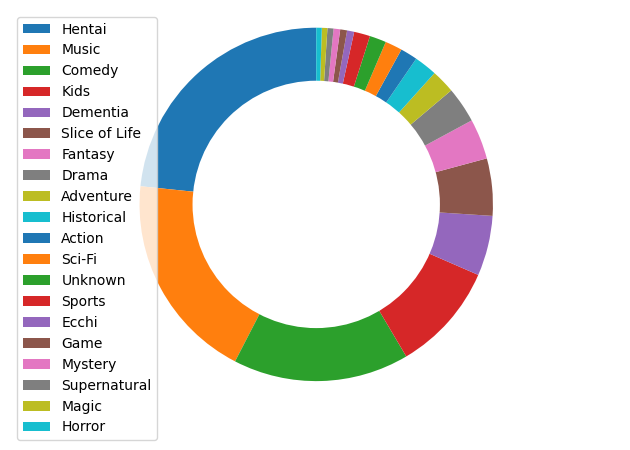

In [10]:
new_dict={}
for key in sorted_d:
    if sorted_d[key] > 20 :
        new_dict[key] = sorted_d[key]
keys1 = new_dict.keys()
values1 = new_dict.values()
patches, texts = plt.pie(values1, startangle=90)
plt.legend(patches, keys1, loc="best")
plt.axis('equal')
plt.tight_layout()

print(len(keys))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [11]:
anime['Aired'].value_counts()

Unknown                         309
2005                             57
2004                             49
2021 to ?                        46
2003                             46
                               ... 
Dec 18, 2009 to Jul 26, 2010      1
Dec 26, 2009                      1
Apr 5, 1993 to Jan 27, 1994       1
Jan 25, 1992                      1
Mar 17, 2021 to ?                 1
Name: Aired, Length: 11947, dtype: int64

In [12]:
def year_extraction(series):
    if series != 'Unknown':
        m = re.search(r'[0-9]{4}', series)
        return m.group()
    else:
        return 0
    
anime['Year'] = anime['Aired'].map(year_extraction).astype(int)

In [13]:
anime['Premiered'].value_counts()

Unknown        12817
Spring 2017       86
Fall 2016         79
Spring 2018       77
Spring 2016       74
               ...  
Winter 1974        1
Summer 1986        1
Winter 1963        1
Winter 1985        1
Winter 1970        1
Name: Premiered, Length: 231, dtype: int64

In [14]:
anime['Type'].value_counts()

TV         4996
OVA        3894
Movie      3041
Special    2218
ONA        1907
Music      1469
Unknown      37
Name: Type, dtype: int64

Only Type TV has premiered information

In [15]:
anime[anime['Type'] == 'Movie'].head(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Year
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,2001
21,31,Neon Genesis Evangelion: Death & Rebirth,7.45,"Drama, Mecha, Psychological, Sci-Fi",Neon Genesis Evangelion:Death & Rebirth,新世紀エヴァンゲリオン劇場版 シト新生,Movie,1,"Mar 15, 1997",Unknown,...,15245.0,23683.0,25396.0,12694.0,6313.0,2636.0,1042.0,654.0,737.0,1997
22,32,Neon Genesis Evangelion: The End of Evangelion,8.51,"Sci-Fi, Dementia, Psychological, Drama, Mecha",Neon Genesis Evangelion:The End of Evangelion,新世紀エヴァンゲリオン劇場版 THE END OF EVANGELION,Movie,1,"Jul 19, 1997",Unknown,...,95821.0,77593.0,41261.0,16444.0,7057.0,4493.0,2279.0,1941.0,2264.0,1997
24,43,Koukaku Kidoutai,8.29,"Action, Mecha, Police, Psychological, Sci-Fi, ...",Ghost in the Shell,GHOST IN THE SHELL（攻殻機動隊）,Movie,1,"Nov 18, 1995",Unknown,...,65298.0,70881.0,39446.0,13704.0,5107.0,1842.0,675.0,292.0,486.0,1995
27,46,Rurouni Kenshin: Meiji Kenkaku Romantan - Ishi...,7.56,"Samurai, Historical, Drama, Shounen",Samurai X:The Motion Picture,るろうに剣心 -明治剣客浪漫譚- 維新志士への鎮魂歌,Movie,1,"Dec 20, 1997",Unknown,...,3683.0,6232.0,6557.0,2832.0,1310.0,426.0,129.0,71.0,59.0,1997


In [16]:
anime['Premiered'].str.match('(Spring|Summer|Fall|Winter) [0-9]{4}').sum()

4745

In [17]:
anime['Season'] = anime['Premiered'].str.split(pat=' ', expand=True)[0]
anime['Season'].value_counts().reset_index()

,index,Season
0,Unknown,12817
1,Spring,1611
2,Fall,1389
3,Winter,942
4,Summer,803


In [18]:
anime['Score'].value_counts()

Unknown    5141
6.48         74
6.3          72
6.31         72
6.52         71
           ... 
3.19          1
4.2           1
4.35          1
3.32          1
4.06          1
Name: Score, Length: 533, dtype: int64

In [19]:
anime['Score'] = anime['Score'].replace('Unknown', 0).astype(float)

In [20]:
def split_labels(series):
    series = series.split(",")
    if "Unknown" in series:
        series.remove("Unknown")
    return series

anime["Genres"] = anime["Genres"].map(split_labels)
anime["Studios"] = anime["Studios"].map(split_labels)

In [21]:
anime_year = pd.DataFrame(anime.groupby('Year').count()['MAL_ID']).reset_index()

In [22]:
tmp = anime_year.drop(index=0)
tmp1 = tmp.sort_values('MAL_ID',ascending=False)
tmp1

year = tmp1["Year"].tolist()[0:20]
values2 = tmp1["MAL_ID"].tolist()[0:20]


TOP 20 YEARS BASED ON ANIME COUNT

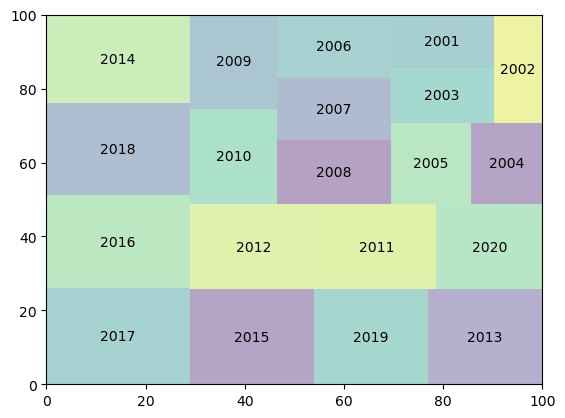

In [23]:
!pip install squarify 
import matplotlib.pyplot as plt
import squarify 
squarify.plot(sizes=values2, label=year, alpha=0.4 )
plt.show()

ANIME IN EACH YEAR

Text(0, 0.5, 'Count of Anime')

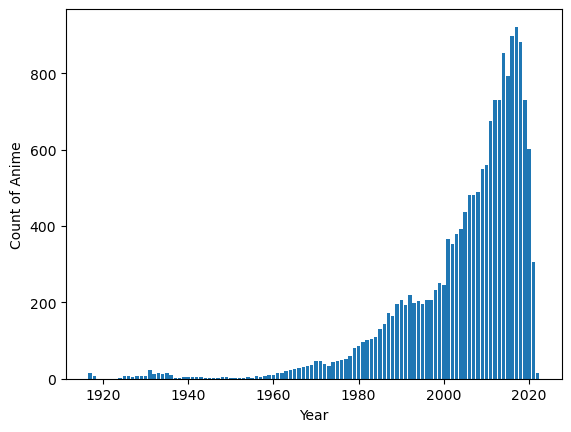

In [24]:
anime_by_year = pd.DataFrame(anime.groupby('Year').count()['MAL_ID']).reset_index()
anime_by_year
x = anime_by_year.drop(index = 0)
plt.bar(x['Year'], x['MAL_ID'],width = 0.8)
plt.xlabel("Year")
plt.ylabel("Count of Anime")

Top 50 anime as per score

In [25]:
anime_50 = anime.sort_values('Score', ascending=False).head(50)
anime_50.head(5)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Year,Season
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"[Action, Military, Adventure, Comedy, Dram...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,...,199160.0,70045.0,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0,2009,Spring
15926,40028,Shingeki no Kyojin: The Final Season,9.17,"[Action, Military, Mystery, Super Power, D...",Attack on Titan Final Season,進撃の巨人 The Final Season,TV,16,"Dec 7, 2020 to ?",Winter 2021,...,26016.0,8793.0,2674.0,1336.0,588.0,382.0,514.0,11061.0,2020,Winter
5683,9253,Steins;Gate,9.11,"[Thriller, Sci-Fi]",Steins;Gate,STEINS;GATE,TV,24,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,...,140914.0,57740.0,21375.0,11126.0,5061.0,2292.0,1678.0,5255.0,2011,Spring
14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"[Action, Drama, Fantasy, Military, Mystery...",Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,TV,10,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,...,110481.0,33662.0,8365.0,2974.0,1108.0,550.0,385.0,4169.0,2019,Spring
9913,28977,Gintama°,9.10,"[Action, Comedy, Historical, Parody, Samur...",Gintama Season 4,銀魂°,TV,51,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,...,21360.0,10215.0,3898.0,2311.0,952.0,648.0,1100.0,4508.0,2015,Spring


In [26]:
anime50_year =  pd.DataFrame(anime_50.groupby('Year').count()['MAL_ID']).reset_index()
anime50_year.sort_values('MAL_ID', ascending = False).head(5)

,Year,MAL_ID
18,2017,6
21,2020,5
20,2019,4
15,2014,3
17,2016,3


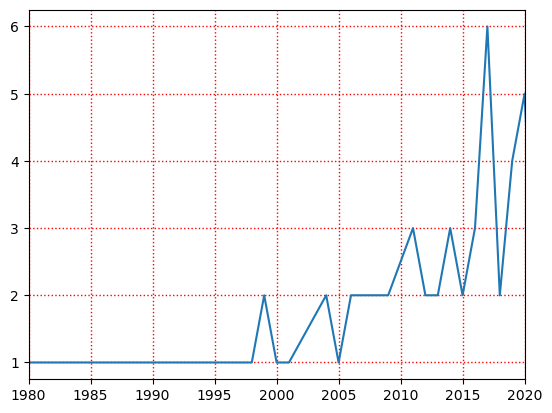

In [27]:
plt.plot(anime50_year['Year'], anime50_year['MAL_ID'])

x_major_locator = MultipleLocator(5)
y_major_locator = MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.xlim(1980, 2020)
plt.grid(color='r', linestyle='dotted', linewidth=1)
plt.show()

(-0.5, 1499.5, 999.5, -0.5)

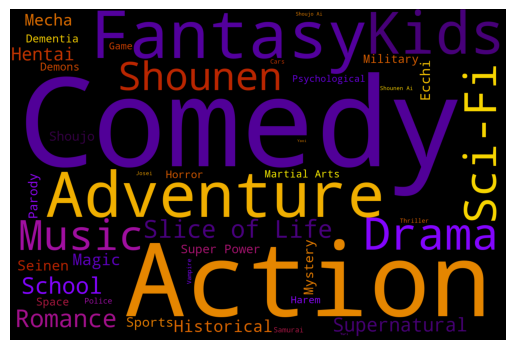

In [28]:
from collections import defaultdict
from wordcloud import WordCloud

genres = defaultdict(int)
for i in anime['Genres']:
    for j in i:
        genres[j.strip()] += 1
        
cloud = WordCloud(width=1500, height=1000, background_color='black', colormap='gnuplot').generate_from_frequencies(genres)
plt.imshow(cloud)
plt.axis('off')

In [32]:
anime1=pd.read_csv("/Users/adithyaabhishek/Desktop/USML/project/report/data/anime.csv", dtype=str) 
anime1.drop(anime[anime['Type'] == 'Unknown'].index, inplace = True)
unique_type = []
for i in anime1['Type']:
    if i not in unique_type:
        unique_type.append(i)
# unique_type = [i[0] for i in unique_type]
print(unique_type)
# import numpy as np
# print(np.array(unique_type))

['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music']


In [33]:
counts_type = {}
for i in unique_type:
    counts_type[i] = (anime['Type'] == i).sum()
counts_type

{'TV': 4996,
 'Movie': 3041,
 'OVA': 3894,
 'Special': 2218,
 'ONA': 1907,
 'Music': 1469}

In [34]:
type_name = counts_type.keys()
type_values = counts_type.values()

COUNTS OF TYPE OF ANIME

Text(0, 0.5, 'Coun')

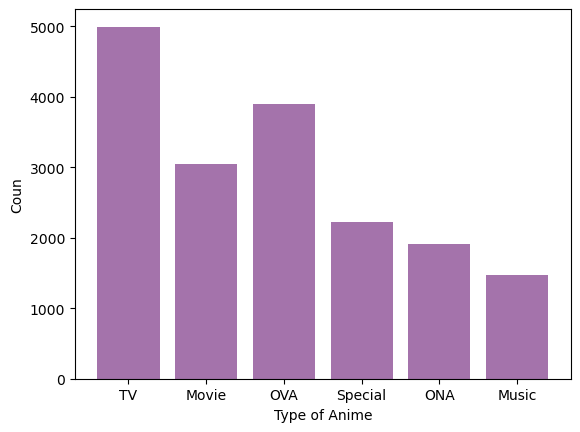

In [35]:
plt.bar(type_name,type_values,width =0.8,color='#A473AB')
plt.xlabel("Type of Anime")
plt.ylabel("Coun")

## Content Based Filtering

In [60]:
anime =  pd.read_csv('/Users/adithyaabhishek/Desktop/USML/project/report/data/anime.csv')
usecols = ['MAL_ID', 'Name', 'sypnopsis']
anime_desc = pd.read_csv('/Users/adithyaabhishek/Desktop/USML/project/report/data/anime_with_synopsis.csv', usecols=usecols)

In [61]:
anime['Score'] = anime['Score'].replace('Unknown', 0).astype(float)

In [62]:
def categorize(df, col, is_multilabel=False):
    binarizer = LabelBinarizer()
    if is_multilabel:
        binarizer = MultiLabelBinarizer()
        
    expandedLabelData = binarizer.fit_transform(df[col])
    labelClasses = binarizer.classes_

    category = pd.DataFrame(expandedLabelData, columns=labelClasses)
    del df[col]
    return pd.concat([df, category], axis=1)

In [63]:
anime_metadata = anime[['MAL_ID', 'Name', 'Genres', 'Japanese name', 'Type', 'Studios', 'Source', 'Rating']].copy()

anime_metadata = categorize(anime_metadata, 'Type')
anime_metadata = categorize(anime_metadata, 'Source')
anime_metadata = categorize(anime_metadata, 'Rating')
anime_metadata = categorize(anime_metadata, 'Genres', is_multilabel=True)
anime_metadata = categorize(anime_metadata, 'Studios', is_multilabel=True)

anime_id = anime_metadata[['MAL_ID', 'Name', 'Japanese name']]

del anime_metadata['Unknown']
del anime_metadata['MAL_ID']
del anime_metadata['Name']
del anime_metadata['Japanese name']

print(anime_metadata.shape)
anime_metadata.head()

(17562, 146)


,Movie,Music,ONA,OVA,Special,TV,4-koma manga,Book,Card game,Digital manga,...,v,w,x,y,z,°,²,é,ό,・
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
anime_id = anime['MAL_ID'].copy()
anime_metadata2 = pd.merge(anime_id, anime_desc, on='MAL_ID', how='left').fillna('').astype(str)
anime_metadata2.head()

,MAL_ID,Name,sypnopsis
0,1,Cowboy Bebop,"In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,"other day, another bounty—such is the life of ..."
2,6,Trigun,"Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,ches are individuals with special powers like ...
4,8,Bouken Ou Beet,It is the dark century and the people are suff...


In [65]:
tfv = TfidfVectorizer(min_df=3, max_features=None,
                      strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}',
                      ngram_range=(1, 3),
                      stop_words = 'english')

synopsis = anime_metadata2['sypnopsis']
synopsis_tf_idf = tfv.fit_transform(synopsis)
synopsis_tf_idf.shape

(17562, 38694)

In [66]:
metadata_full = np.concatenate((anime_metadata.values, synopsis_tf_idf.todense()), axis=1)

In [67]:
knn = NearestNeighbors(metric='cosine', n_neighbors=9)
knn.fit(csr_matrix(metadata_full))

NearestNeighbors(metric='cosine', n_neighbors=9)

In [68]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=3)
# neigh.fit(csr_matrix(all_meta_data)) 
# label=neigh.predict(csr_matrix(all_meta_data))

In [69]:
def recommend_content(query_index):
    dist, indices = knn.kneighbors(metadata_full[query_index,:].reshape(1, -1), n_neighbors=11)
    res = []
    for i in range(0, len(dist.flatten())):
        index = indices.flatten()[i]
        if index == query_index:
            continue
        res.append(anime.iloc[index])
    return pd.DataFrame(res)

In [70]:
def search(keyword):
    query1 = anime['Japanese name'].str.contains(keyword, case=False)
    query2 = anime['English name'].str.contains(keyword, case=False)
    print(anime[query1 | query2][['Name', 'Japanese name']].head(20))
    return anime[query1 | query2].head(1).index

In [80]:
# recommend_content(search('この音とまれ！'))
recommend_content(search('ナルト'))


                                                    Name  \
10                                                Naruto   
696            Naruto: Akaki Yotsuba no Clover wo Sagase   
1574                                  Naruto: Shippuuden   
1963   Naruto Movie 3: Dai Koufun! Mikazuki Jima no A...   
2267                          Naruto: Shippuuden Movie 1   
3639                 Naruto: Shippuuden Movie 2 - Kizuna   
4553   Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...   
4985                             Naruto: The Cross Roads   
5304         Naruto: Shippuuden Movie 4 - The Lost Tower   
6285           Naruto: Shippuuden Movie 5 - Blood Prison   
6309   Naruto Soyokazeden Movie: Naruto to Mashin to ...   
6319   Naruto: Honoo no Chuunin Shiken! Naruto vs. Ko...   
6875    Naruto SD: Rock Lee no Seishun Full-Power Ninden   
8088              Naruto: Shippuuden - Sunny Side Battle   
11340  Boruto: Naruto the Movie - Naruto ga Hokage ni...   

                                   Japa

/Users/adithyaabhishek/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
1574,1735,Naruto: Shippuuden,8.16,"Action, Adventure, Comedy, Super Power, Martia...",Naruto:Shippuden,ナルト- 疾風伝,TV,500,"Feb 15, 2007 to Mar 23, 2017",Winter 2007,...,249262.0,213677.0,239113.0,175685.0,75970.0,36221.0,15913.0,6661.0,3383.0,4245.0
12802,35072,Boruto: Jump Festa 2016 Special,6.22,"Action, Adventure, Comedy, Super Power, Martia...",Unknown,BORUTOジャンプフェスタ 2016,Special,1,"Nov 27, 2016",Unknown,...,331.0,175.0,386.0,1070.0,1274.0,774.0,330.0,112.0,78.0,114.0
245,269,Bleach,7.80,"Action, Adventure, Comedy, Super Power, Supern...",Bleach,BLEACH - ブリーチ -,TV,366,"Oct 5, 2004 to Mar 27, 2012",Fall 2004,...,116063.0,136177.0,192980.0,174721.0,81327.0,42155.0,16961.0,6766.0,3102.0,2906.0
12492,34566,Boruto: Naruto Next Generations,5.81,"Action, Adventure, Super Power, Martial Arts, ...",Boruto:Naruto Next Generations,BORUTO -NARUTO NEXT GENERATIONS-,TV,Unknown,"Apr 5, 2017 to ?",Spring 2017,...,13925.0,12533.0,26748.0,48401.0,46794.0,35149.0,26204.0,14066.0,9479.0,13039.0
5304,8246,Naruto: Shippuuden Movie 4 - The Lost Tower,7.42,"Action, Comedy, Martial Arts, Shounen, Super P...",Unknown,劇場版 NARUTO-ナルト-疾風伝 ザ・ロストタワー,Movie,1,"Jul 31, 2010",Unknown,...,11387.0,13079.0,24809.0,28116.0,13612.0,6106.0,2228.0,960.0,437.0,285.0
9862,28755,Boruto: Naruto the Movie,7.50,"Action, Comedy, Martial Arts, Shounen, Super P...",Boruto:Naruto the Movie,BORUTO -NARUTO THE MOVIE-,Movie,1,"Aug 7, 2015",Unknown,...,21653.0,30165.0,56070.0,55701.0,25203.0,10402.0,4074.0,1772.0,943.0,1074.0
4553,6325,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.35,"Action, Comedy, Martial Arts, Shounen, Super P...",Unknown,ナルト- 疾風伝 火の意志を継ぐ者,Movie,1,"Aug 1, 2009",Unknown,...,8769.0,10021.0,20222.0,26159.0,12201.0,5437.0,1827.0,715.0,322.0,245.0
6055,10075,Naruto x UT,7.40,"Action, Comedy, Super Power, Martial Arts, Sho...",Unknown,NARUTO×UT,OVA,1,"Jan 1, 2011",Unknown,...,3218.0,2549.0,4010.0,4857.0,2892.0,1510.0,435.0,230.0,127.0,172.0
214,238,Rekka no Honoo,7.36,"Action, Adventure, Martial Arts, Shounen, Supe...",Flame of Recca,烈火の炎,TV,42,"Jul 19, 1997 to Jul 10, 1998",Summer 1997,...,1668.0,2980.0,6203.0,7513.0,3338.0,1659.0,575.0,205.0,98.0,89.0
6285,10589,Naruto: Shippuuden Movie 5 - Blood Prison,7.46,"Action, Adventure, Martial Arts, Super Power, ...",Unknown,劇場版NARUTO-ナルト- ブラッド・プリズン,Movie,1,"Jul 30, 2011",Unknown,...,10644.0,12623.0,24147.0,26212.0,12341.0,5381.0,1945.0,736.0,395.0,293.0


## Collaborative Filtering

In [82]:
rating = pd.read_csv('/Users/adithyaabhishek/Desktop/USML/project/report/data/rating_complete.csv')
user_anime = rating.groupby('user_id').size().reset_index()
user_anime.columns = ['user_id', 'anime_count']
user_anime.head()

,user_id,anime_count
0,0,35
1,1,103
2,2,51
3,3,315
4,4,118


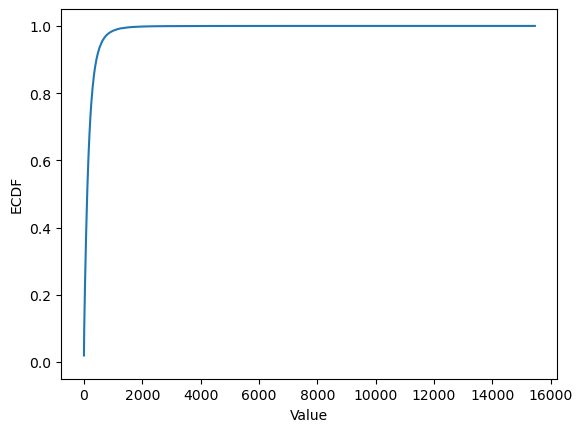

In [83]:
cdf = user_anime['anime_count'].value_counts().sort_index().cumsum()

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05])
plt.show()

In [84]:
set_of_filtered_users = user_anime[user_anime['anime_count'] > 280]
users = set(set_of_filtered_users['user_id'])

In [85]:
rating_info = rating[rating['user_id'].isin(users)]

In [86]:
anime =  pd.read_csv('/Users/adithyaabhishek/Desktop/USML/project/report/data/anime.csv')
unq_users = {int(x): i for i,x in enumerate(rating_info['user_id'].unique())}
unq_items = {int(x): i for i,x in enumerate(anime['MAL_ID'].unique())}

print(len(unq_items), len(unq_users))
anime_collabolative_filter = np.zeros((len(unq_items), len(unq_users)))

for user_id, anime_id, rating in rating_info.values:
    anime_collabolative_filter[unq_items[anime_id], unq_users[user_id]] = rating


17562 62086


In [87]:
knn = NearestNeighbors(metric='cosine', n_neighbors=9)
knn.fit(anime_collabolative_filter)

NearestNeighbors(metric='cosine', n_neighbors=9)

In [88]:
def cf_recommend_anime(query_index):
    dist, indices = knn.kneighbors(anime_collabolative_filter[query_index,:].reshape(1, -1), n_neighbors=11)
    res = []
    for i in range(0, len(dist.flatten())):
        index = indices.flatten()[i]
        if index == query_index:
            continue
        res.append(anime.iloc[index])
        
    return pd.DataFrame(res)

In [89]:
cf_recommend_anime(search('ナルト'))

                                                    Name  \
10                                                Naruto   
696            Naruto: Akaki Yotsuba no Clover wo Sagase   
1574                                  Naruto: Shippuuden   
1963   Naruto Movie 3: Dai Koufun! Mikazuki Jima no A...   
2267                          Naruto: Shippuuden Movie 1   
3639                 Naruto: Shippuuden Movie 2 - Kizuna   
4553   Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...   
4985                             Naruto: The Cross Roads   
5304         Naruto: Shippuuden Movie 4 - The Lost Tower   
6285           Naruto: Shippuuden Movie 5 - Blood Prison   
6309   Naruto Soyokazeden Movie: Naruto to Mashin to ...   
6319   Naruto: Honoo no Chuunin Shiken! Naruto vs. Ko...   
6875    Naruto SD: Rock Lee no Seishun Full-Power Ninden   
8088              Naruto: Shippuuden - Sunny Side Battle   
11340  Boruto: Naruto the Movie - Naruto ga Hokage ni...   

                                   Japa

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
1393,1535,Death Note,8.63,"Mystery, Police, Psychological, Supernatural, ...",Death Note,デスノート,TV,37,"Oct 4, 2006 to Jun 27, 2007",Fall 2006,...,557406.0,535252.0,415890.0,201522.0,68577.0,28048.0,10462.0,3692.0,2256.0,3586.0
7449,16498,Shingeki no Kyojin,8.48,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan,進撃の巨人,TV,25,"Apr 7, 2013 to Sep 29, 2013",Spring 2013,...,470882.0,514879.0,459113.0,220228.0,70768.0,31141.0,11805.0,4637.0,2707.0,4939.0
6614,11757,Sword Art Online,7.25,"Action, Game, Adventure, Romance, Fantasy",Sword Art Online,ソードアート・オンライン,TV,25,"Jul 8, 2012 to Dec 23, 2012",Summer 2012,...,241049.0,236672.0,305386.0,303813.0,188431.0,124819.0,81155.0,44204.0,25371.0,23472.0
1574,1735,Naruto: Shippuuden,8.16,"Action, Adventure, Comedy, Super Power, Martia...",Naruto:Shippuden,ナルト- 疾風伝,TV,500,"Feb 15, 2007 to Mar 23, 2017",Winter 2007,...,249262.0,213677.0,239113.0,175685.0,75970.0,36221.0,15913.0,6661.0,3383.0,4245.0
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,...,714811.0,401507.0,199160.0,70045.0,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0
10451,30276,One Punch Man,8.57,"Action, Sci-Fi, Comedy, Parody, Super Power, S...",One Punch Man,ワンパンマン,TV,12,"Oct 5, 2015 to Dec 21, 2015",Fall 2015,...,360187.0,465041.0,403832.0,172181.0,47365.0,17873.0,5706.0,2279.0,1448.0,2733.0
5975,9919,Ao no Exorcist,7.59,"Action, Demons, Fantasy, Shounen, Supernatural",Blue Exorcist,青の祓魔師(エクソシスト),TV,25,"Apr 17, 2011 to Oct 2, 2011",Spring 2011,...,80157.0,137344.0,248970.0,240338.0,99008.0,40731.0,13431.0,4567.0,1786.0,1448.0
8646,22319,Tokyo Ghoul,7.81,"Action, Mystery, Horror, Psychological, Supern...",Tokyo Ghoul,東京喰種-トーキョーグール-,TV,12,"Jul 4, 2014 to Sep 19, 2014",Summer 2014,...,190342.0,250814.0,348603.0,261579.0,112177.0,51649.0,24805.0,10284.0,5144.0,4794.0
1431,1575,Code Geass: Hangyaku no Lelouch,8.72,"Action, Military, Sci-Fi, Super Power, Drama, ...",Code Geass:Lelouch of the Rebellion,コードギアス 反逆のルルーシュ,TV,25,"Oct 6, 2006 to Jul 29, 2007",Fall 2006,...,326710.0,309688.0,213516.0,93305.0,31697.0,14686.0,7065.0,3100.0,1630.0,2621.0
11185,31964,Boku no Hero Academia,8.11,"Action, Comedy, School, Shounen, Super Power",My Hero Academia,僕のヒーローアカデミア,TV,13,"Apr 3, 2016 to Jun 26, 2016",Spring 2016,...,192539.0,318675.0,414913.0,253871.0,77961.0,29893.0,9015.0,3664.0,1807.0,3129.0
